# Studying chapter 03


In [1]:
%pip install pandas
%pip install matplotlib
%pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: C:\Users\rlvv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: C:\Users\rlvv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: C:\Users\rlvv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

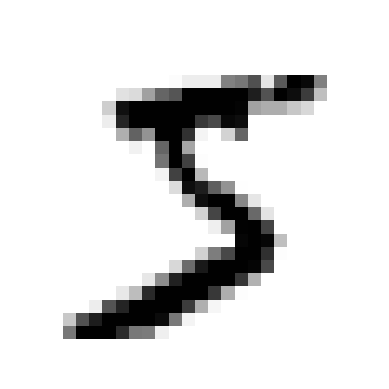

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
import numpy as np

y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training a "Binary Classifier for 5s"


In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [11]:
sgd_clf.predict([some_digit])

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9647
0.9385
0.9255


In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(clone_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96285, 0.95715, 0.96735])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54103,   476],
       [ 1848,  3573]], dtype=int64)

In [16]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8824401086688071

In [18]:
recall_score(y_train_5, y_train_pred)

0.659103486441616

In [19]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7545934530095036

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([624.41465397])

In [21]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [22]:
threshold = 8000

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Determining the threshold to use with the decision function


In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

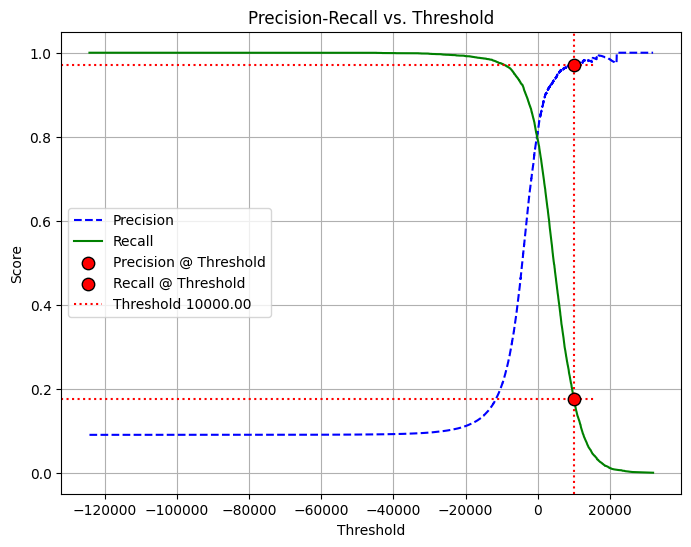

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, highlight_threshold=10000):
    plt.figure(figsize=(8, 6))

    # Plot Precision and Recall curves
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    

    # Highlight a specific threshold if provided
    if highlight_threshold is not None:
        xmax_norm = ((highlight_threshold - thresholds.min()) / (thresholds.max() - thresholds.min()))

        # Find closest index for the given threshold
        closest_idx = np.argmin(np.abs(thresholds - highlight_threshold))
        precision_at_threshold = precisions[closest_idx]
        recall_at_threshold = recalls[closest_idx]

        # Add red dot at the intersection points
        plt.scatter([highlight_threshold], [precision_at_threshold], color="red", s=80, label="Precision @ Threshold", edgecolors="black", zorder=3)
        plt.scatter([highlight_threshold], [recall_at_threshold], color="red", s=80, label="Recall @ Threshold", edgecolors="black", zorder=3)

        # Add a horizontal line from the dots
        plt.axhline(precision_at_threshold, xmax=xmax_norm, color="r", linestyle=":")
        plt.axhline(recall_at_threshold, xmax=xmax_norm, color="r", linestyle=":")

    plt.axvline(highlight_threshold, color="r", linestyle=":", label=f"Threshold {highlight_threshold:.2f}")

    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.title("Precision-Recall vs. Threshold")
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

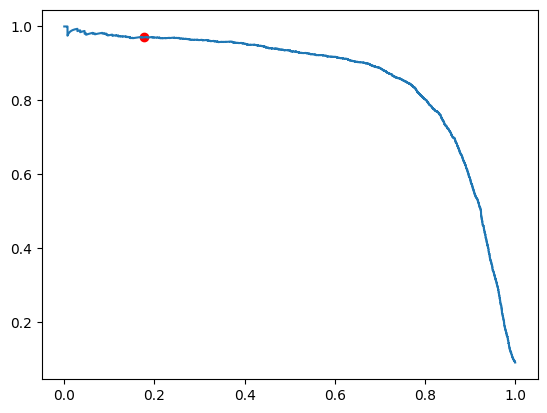

In [26]:
# Find closest index for the given threshold
closest_idx = np.argmin(np.abs(thresholds - 10000))
precision_at_threshold = precisions[closest_idx]
recall_at_threshold = recalls[closest_idx]

plt.plot(recalls, precisions)
plt.scatter(recall_at_threshold, precision_at_threshold, color="r")

In [27]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [28]:
precision_score(y_train_5, y_train_pred_90)

0.9001729676303435

In [29]:
recall_score(y_train_5, y_train_pred_90)

0.6720162331673123

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

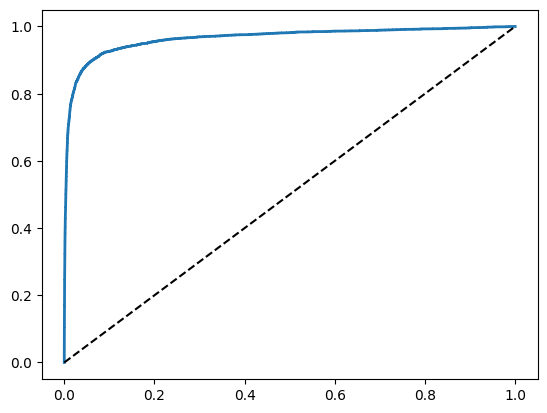

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

plot_roc_curve(fpr, tpr) 
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9651718359107199

Implementing a random forest classifier for comparison


In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [34]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [35]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

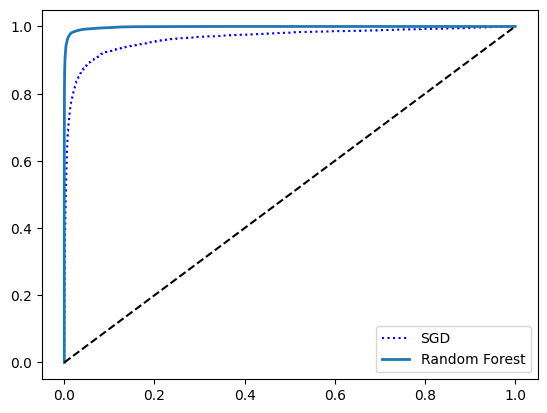

In [36]:
plt.plot(fpr, tpr, "b:", label="SGD") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="lower right") 
plt.show()

In [37]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [38]:
y_train_5_float = y_train_5.astype(float)
y_train_5_float

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    1.0
59998    0.0
59999    0.0
Name: class, Length: 60000, dtype: float64

In [39]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [40]:
precision_score(y_train_5_float, y_scores_forest.round())

0.9905083315756169

In [41]:
recall_score(y_train_5_float, y_scores_forest.round())

0.8662608374838591

Multiclass Classification


In [42]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [43]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [44]:
np.argmax(some_digit_scores)

5

In [45]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [46]:
svm_clf.classes_[5]

5

In [47]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:273

array([5], dtype=uint8)

In [48]:
len(ovr_clf.estimators_)

10

In [49]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [50]:
sgd_clf.decision_function([some_digit])

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ -8646.23260043, -23487.60879707,  -5186.30166662,
           482.06505135, -20135.70901216,     32.88372624,
        -32025.15883227, -16976.82241914,  -9188.11897212,
        -15050.35647834]])

In [51]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88485, 0.8691 , 0.84155])

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.89625, 0.89175, 0.9016 ])

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

conf_mx

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5578,    0,   23,    7,    8,   49,   35,    7,  215,    1],
       [   0, 6409,   40,   24,    5,   44,    4,    8,  197,   11],
       [  29,   26, 5266,   93,   70,   27,   65,   39,  332,   11],
       [  23,   18,  119, 5249,    2,  216,   26,   41,  365,   72],
       [  10,   14,   50,   13, 5222,   12,   35,   24,  300,  162],
       [  26,   15,   34,  174,   52, 4499,   75,   17,  473,   56],
       [  30,   16,   48,    2,   43,   99, 5557,    5,  117,    1],
       [  21,   10,   54,   28,   52,   13,    3, 5712,  171,  201],
       [  17,   63,   49,   92,    3,  125,   27,   11, 5417,   47],
       [  24,   18,   30,   67,  117,   42,    1,  184,  344, 5122]],
      dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

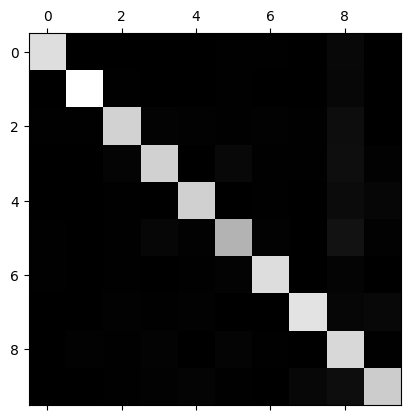

In [54]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show

In [55]:
import pandas as pd

def plot_digits(x, images_per_row: int):
    """Displays multiple digit images from a DataFrame or NumPy array in a grid format."""
    if isinstance(x, pd.DataFrame):
        x = x.values  # Convert DataFrame to NumPy array

    num_images = x.shape[0]  # Number of images
    image_size = int(np.sqrt(x.shape[1]))  # Assuming square images (e.g., 28x28)

    # Reshape each row into a square image
    x_reshaped = x.reshape(-1, image_size, image_size)

    # Compute number of rows needed
    num_rows = (num_images + images_per_row - 1) // images_per_row  # Ceiling division

    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row, num_rows))
    
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(x_reshaped[i], cmap=plt.cm.gray)
            ax.axis('off')
        else:
            ax.set_visible(False)  # Hide unused subplots

In [56]:
cl_a, cl_b = 3, 5 
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] 
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] 
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] 
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

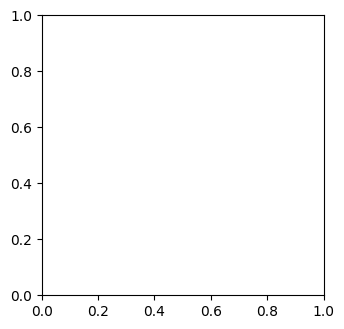

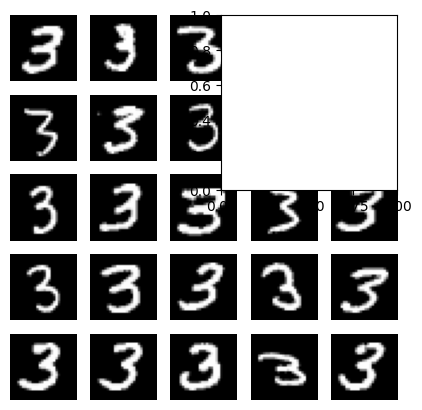

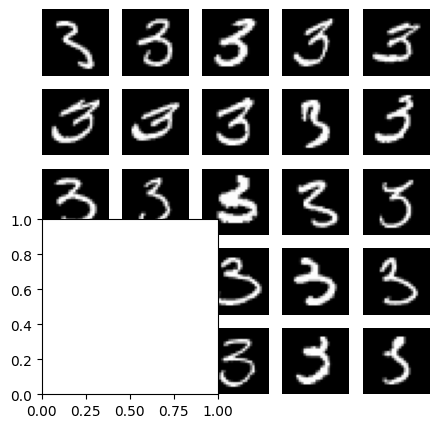

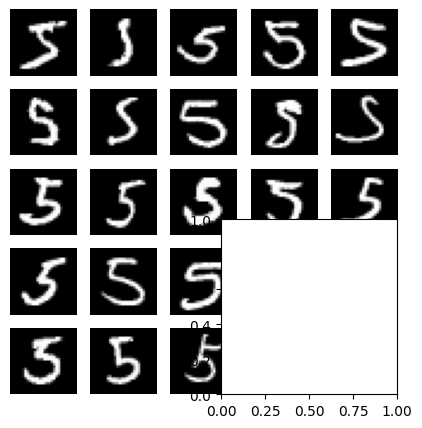

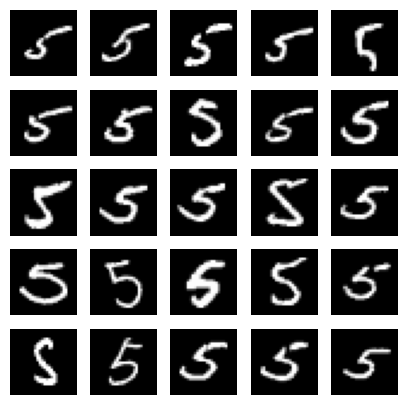

In [57]:
plt.figure(figsize=(8,8)) 
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) 
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) 
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) 
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5) 
plt.show()

Multilabel classification


In [58]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # select only large numbers
y_train_odd = (y_train % 2 == 1) # select only odd numbers
y_multilabel = np.c_[y_train_large, y_train_odd] # combine both arrays to create a multilabel dataset

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [59]:
knn_clf.predict([some_digit])
# >>> some_digit = 5
# >>> output = array([[False, True]]) -> Not large but odd

C:\Users\rlvv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [60]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

Multioutput classification


In [61]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train 
y_test_mod = X_test

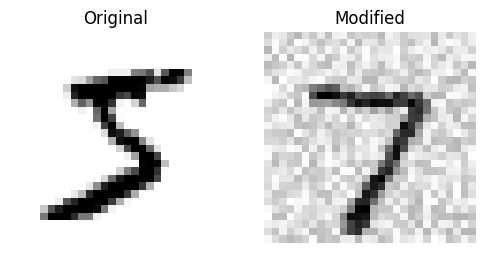

In [62]:
some_digit_image_mod = X_test_mod.iloc[0]
some_digit_image = X_test.iloc[0]

some_digit_image = some_digit.values.reshape(28, 28)
some_digit_image_mod = some_digit_image_mod.values.reshape(28, 28)

import matplotlib.pyplot as plt

def plot_comparison(original, modified):
    """Plots two images side by side for comparison."""
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

    axes[0].imshow(original, cmap="binary")
    axes[0].axis("off")
    axes[0].set_title("Original")

    axes[1].imshow(modified, cmap="binary")
    axes[1].axis("off")
    axes[1].set_title("Modified")

    plt.show()

plot_comparison(some_digit_image, some_digit_image_mod)


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the test sample is passed correctly
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit_label = knn_clf.predict(X_test_mod.iloc[[0]])  # Keep as 2D

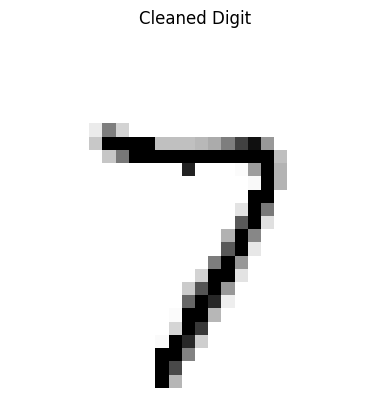

In [64]:
# Reshape into 28x28 format
clean_digit_image = clean_digit_label.reshape(28, 28)  # Assuming images are 28x28

# Plot the cleaned image
plt.imshow(clean_digit_image, cmap="binary")
plt.axis("off")
plt.title("Cleaned Digit")
plt.show()